In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import mne

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif...
Isotrak not found
    Range : 34580 ... 35542 =    138.320 ...   142.168 secs
Ready.
Reading 0 ... 962  =      0.000 ...     3.848 secs...


<ipython-input-180-ac5cc38038e9>:1: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawR1 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif', preload=True)


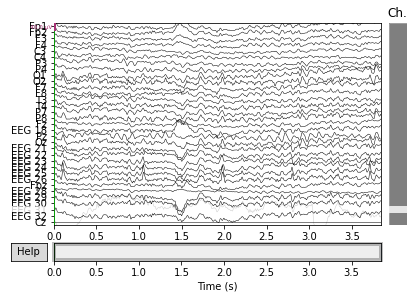

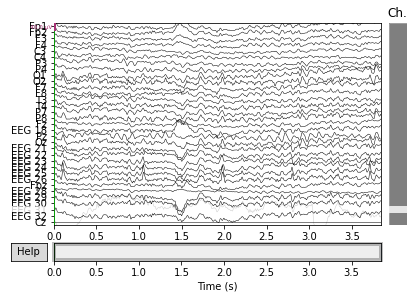

In [180]:
rawR1 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif', preload=True)
rawR1.rename_channels(mapping={'EEG 1': 'Fp1', 'EEG 2': 'Fp2', 'EEG 3': 'F3', 'EEG 4': 'F4', 'EEG 5': 'C3', \
                               'EEG 6': 'C4', 'EEG 7': 'P3', 'EEG 8': 'P4', 'EEG 9': 'O1', 'EEG 10': 'O2', \
                               'EEG 11': 'F7', 'EEG 12': 'F8', 'EEG 13': 'T3', 'EEG 14': 'T4', 'EEG 15': 'P7', \
                               'EEG 16': 'P8', 'EEG 17': 'Fz', 'EEG 19': 'Pz', 'EEG 20': 'Oz', 'EEG 27': 'Fpz', \
                               'EEG VREF': 'Cz'})
rawR1.plot(n_channels=33)

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif...
Isotrak not found
    Range : 33330 ... 34580 =    133.320 ...   138.320 secs
Ready.
Reading 0 ... 1250  =      0.000 ...     5.000 secs...


<ipython-input-181-e0e7c2beec1a>:1: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawF1 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif', preload=True)


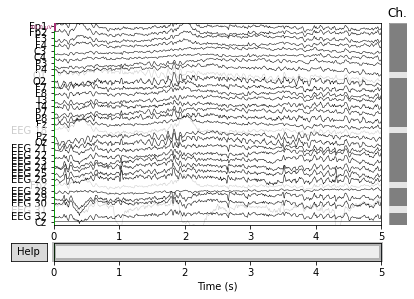

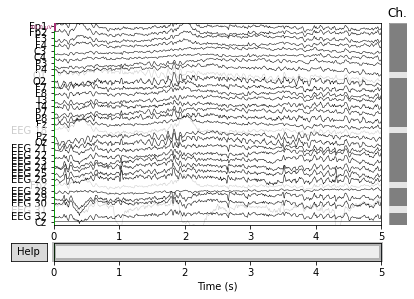

In [181]:
rawF1 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif', preload=True)
rawF1.rename_channels(mapping={'EEG 1': 'Fp1', 'EEG 2': 'Fp2', 'EEG 3': 'F3', 'EEG 4': 'F4', 'EEG 5': 'C3', \
                               'EEG 6': 'C4', 'EEG 7': 'P3', 'EEG 8': 'P4', 'EEG 9': 'O1', 'EEG 10': 'O2', \
                               'EEG 11': 'F7', 'EEG 12': 'F8', 'EEG 13': 'T3', 'EEG 14': 'T4', 'EEG 15': 'P7', \
                               'EEG 16': 'P8', 'EEG 17': 'Fz', 'EEG 19': 'Pz', 'EEG 20': 'Oz', 'EEG 27': 'Fpz', \
                               'EEG VREF': 'Cz'})
rawF1.plot(n_channels=33)

In [182]:
print(rawR1.info)

<Info | 10 non-empty values
 bads: 1 items (EEG 31)
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, P7, ...
 chs: 33 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 lowpass: 125.0 Hz
 meas_date: 2018-09-18 16:06:20 UTC
 meas_id: 4 items (dict)
 nchan: 33
 projs: []
 sfreq: 250.0 Hz
>


In [183]:
print(rawR1.ch_names[:5])

['Fp1', 'Fp2', 'F3', 'F4', 'C3']


In [184]:
data, times = rawR1[:, :]
print(data.shape)

(33, 963)


In [185]:
rawR1.info['bads']

['EEG 31']

EEG 31 skipped -- Bad channel


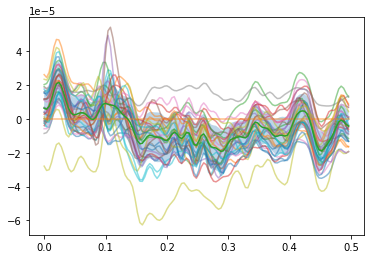

In [186]:
raw_seg = rawR1

erp_seg = [] 
for i in range(33):
    good_ch_bool = True
    for bad_ch in raw_seg.info['bads']:
        if raw_seg.ch_names[i] == bad_ch:
            print( raw_seg.ch_names[i] + " skipped -- Bad channel")
            good_ch_bool = False
    if good_ch_bool:
        plt.plot(times[:125], data[i, :125], alpha=0.5, label= raw_seg.ch_names[i])
        erp_seg.append(data[i, :125])
        
erp_seg = np.array(erp_seg)
erp_mean = np.mean(erp_seg, axis=0)
erp_std = np.std(erp_seg, axis=0)

plt.plot(times[:125], erp_mean)
plt.fill_between(times[:125], erp_mean-erp_std, erp_mean+erp_std, alpha=0.3)

In [187]:
def segment_level_erp(raw_seg):
    erp_seg = [] 
    for i in range(33):
        good_ch_bool = True
        for bad_ch in raw_seg.info['bads']:
            if raw_seg.ch_names[i] == bad_ch:
                print( raw_seg.ch_names[i] + " skipped -- Bad channel")
                good_ch_bool = False
        if good_ch_bool:
#             plt.plot(times[:125], data[i, :125], alpha=0.5, label= raw_seg.ch_names[i])
            erp_seg.append(data[i, :125])

    erp_seg = np.array(erp_seg)
    erp_mean = np.mean(erp_seg, axis=0)
    erp_std = np.std(erp_seg, axis=0)
    
    return times[:125], erp_mean, erp_std   

O1 skipped -- Bad channel
EEG 18 skipped -- Bad channel
Fpz skipped -- Bad channel
EEG 31 skipped -- Bad channel


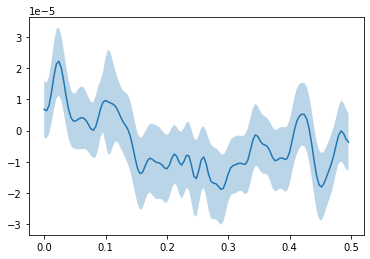

In [188]:
times_R1, erp_mean_R1, erp_std_R1 = segment_level_erp(rawF1)
plt.plot(times_R1, erp_mean_R1)
plt.fill_between(times_R1, erp_mean_R1-erp_std_R1, erp_mean_R1+erp_std_R1, alpha=0.3)

#d : 3,5,10,13,16,17,21

#a : 2,4,7,9,15,19,20

#s : 1,6,8,11,12,14,18


In [189]:
depression_nos = [3,5,10,13,16,17,21]
anxiety_nos = [2,4,7,9,15,19,20]
stress_nos = [1,6,8,11,12,14,18]

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP003.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP103.fif...
Isotrak not found
    Range : 12525 ... 13842 =     50.100 ...    55.368 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP203.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP303.fif...
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP003.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP103.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP203.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

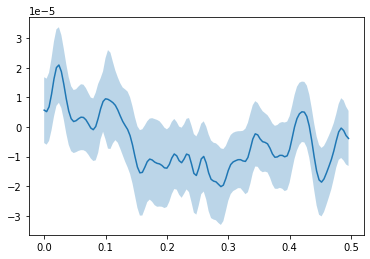

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP005.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP105.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP205.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP305.fif...
REP 05 does not exist!
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP010.fif...
Isotrak not found
    Range : 28071 ... 29109 =    112.284 ...   116.436 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP110.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP210.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP310.fif...
EEG 1 skipped -- Bad channel
EEG 2 s

<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP005.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP105.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP205.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

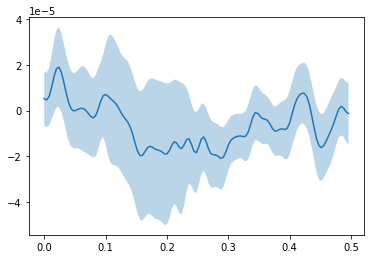

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP013.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif...
Isotrak not found
    Range : 34580 ... 35542 =    138.320 ...   142.168 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP213.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP313.fif...
EEG 31 skipped -- Bad channel


<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP013.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP113.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP213.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

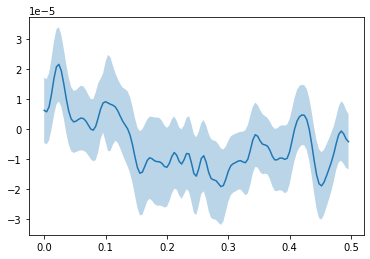

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP016.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP116.fif...
Isotrak not found
    Range : 40971 ... 42067 =    163.884 ...   168.268 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP216.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP316.fif...
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP016.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP116.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP216.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

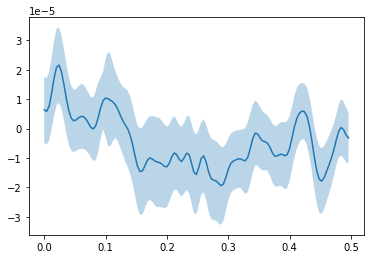

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP017.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP117.fif...
Isotrak not found
    Range : 43317 ... 43984 =    173.268 ...   175.936 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP217.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP317.fif...
EEG 31 skipped -- Bad channel


<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP017.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP117.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP217.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

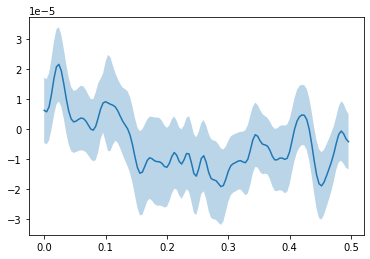

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP021.fif...
Isotrak not found
    Range : 52059 ... 52809 =    208.236 ...   211.236 secs
Ready.
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP121.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP221.fif...
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP321.fif...
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-190-52a30d991c57>:10: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP021.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:16: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP121.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(raw_fif_name)
<ipython-input-190-52a30d991c57>:22: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/REP221.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_s

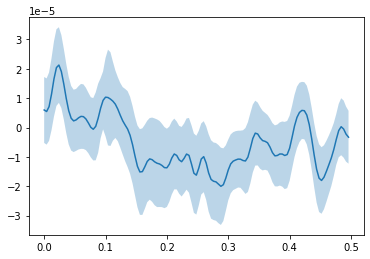

In [190]:
subject_dir = 'reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/'
times_R = []
erp_mean_R = []
erp_std_R = []
for d in depression_nos:
    exception_count = 0
    try:
        R_name = 'REP0' + str(d).zfill(2) + '.fif'
        raw_fif_name = subject_dir + R_name
        rawRi = mne.io.read_raw_fif(raw_fif_name)
    except FileNotFoundError:
        exception_count +=1
    try:
        R_name = 'REP1' + str(d).zfill(2) + '.fif'
        raw_fif_name = subject_dir + R_name
        rawRi = mne.io.read_raw_fif(raw_fif_name)
    except FileNotFoundError:
        exception_count +=1  
    try:
        R_name = 'REP2' + str(d).zfill(2) + '.fif'
        raw_fif_name = subject_dir + R_name
        rawRi = mne.io.read_raw_fif(raw_fif_name)
    except FileNotFoundError:
        exception_count +=1  
    try:
        R_name = 'REP3' + str(d).zfill(2) + '.fif'
        raw_fif_name = subject_dir + R_name
        rawRi = mne.io.read_raw_fif(raw_fif_name)
    except FileNotFoundError:
        exception_count +=1  

    if exception_count == 4:
        print('REP '+ str(d).zfill(2) + ' does not exist!')
        f = open(subject_dir + 'exception_dump.txt', "w+")
        f.write('REP '+ str(d).zfill(2) + ' does not exist!')
        continue
    
    times_Ri, erp_mean_Ri, erp_std_Ri = segment_level_erp(rawRi)
    rawRi.close()
    plt.plot(times_Ri, erp_mean_Ri)
    plt.fill_between(times_Ri, erp_mean_Ri-erp_std_Ri, erp_mean_Ri+erp_std_Ri, alpha=0.3)
    plt.show()
    times_R.append(times_Ri)
    erp_mean_R.append(erp_mean_Ri)
    erp_std_R.append(erp_std_Ri)

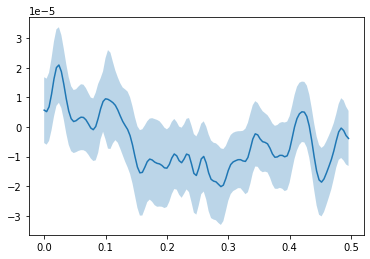

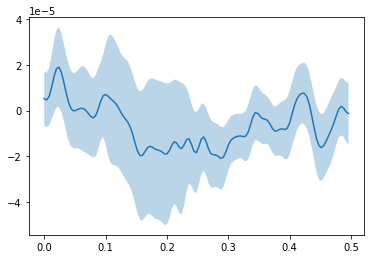

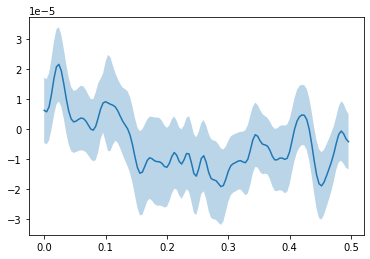

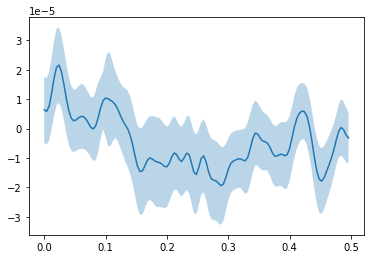

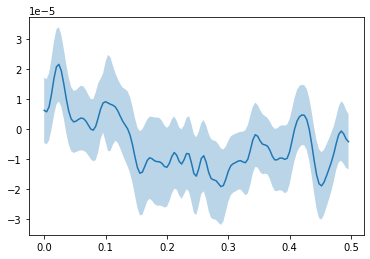

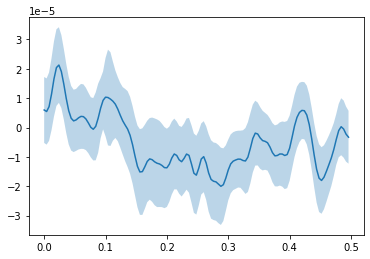

In [191]:
for i in range(len(times_R)): 
    plt.plot(times_R[i], erp_mean_R[i])
    plt.fill_between(times_R[i], erp_mean_R[i]-erp_std_R[i], erp_mean_R[i]+erp_std_R[i], alpha=0.3)
    plt.show()

FIX_21.fif
21
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif...
Isotrak not found
    Range : 50809 ... 52059 =    203.236 ...   208.236 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 5 skipped -- Bad channel
EEG 7 skipped -- Bad channel
EEG 11 skipped -- Bad channel
EEG 13 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 21 skipped -- Bad channel
EEG 26 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


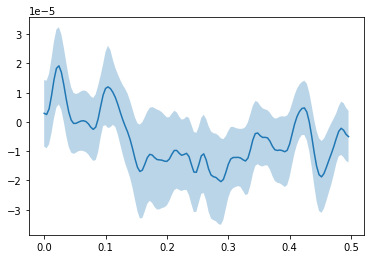

FIX_02.fif
02
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_02.fif...
Isotrak not found
    Range : 8901 ... 10150 =     35.604 ...    40.600 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


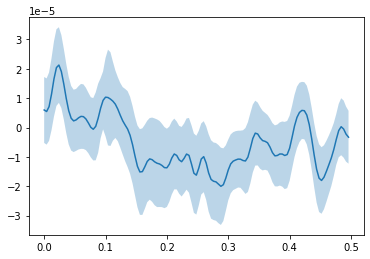

FIX_03.fif
03
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_03.fif...
Isotrak not found
    Range : 11275 ... 12525 =     45.100 ...    50.100 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


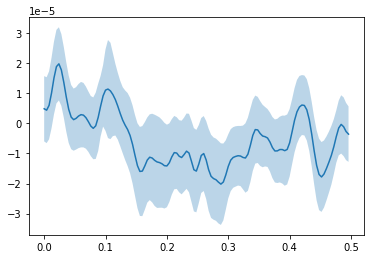

FIX_04.fif
04
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_04.fif...
Isotrak not found
    Range : 13842 ... 15092 =     55.368 ...    60.368 secs
Ready.
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel
EEG 32 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


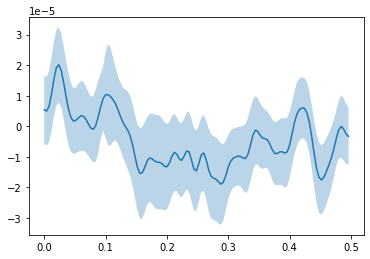

FIX_05.fif
05
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_05.fif...
Isotrak not found
    Range : 16817 ... 18067 =     67.268 ...    72.268 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel
EEG 32 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


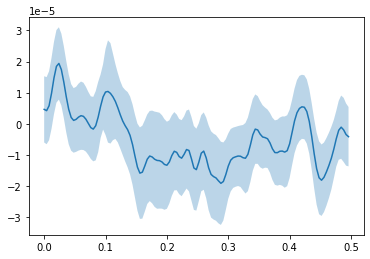

FIX_06.fif
06
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_06.fif...
Isotrak not found
    Range : 18775 ... 20025 =     75.100 ...    80.100 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


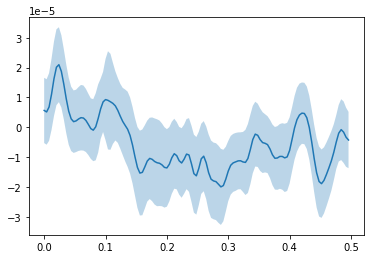

FIX_07.fif
07
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_07.fif...
Isotrak not found
    Range : 20480 ... 21730 =     81.920 ...    86.920 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_07.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


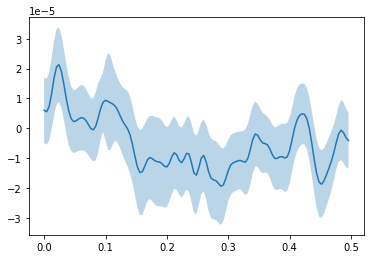

FIX_08.fif
08
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_08.fif...
Isotrak not found
    Range : 22442 ... 23692 =     89.768 ...    94.768 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel
EEG 32 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_08.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


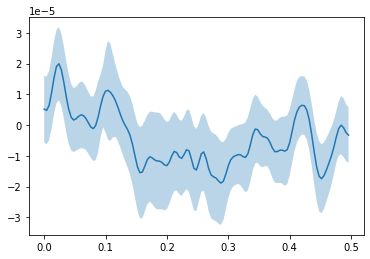

FIX_09.fif
09
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_09.fif...
Isotrak not found
    Range : 24600 ... 25850 =     98.400 ...   103.400 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_09.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


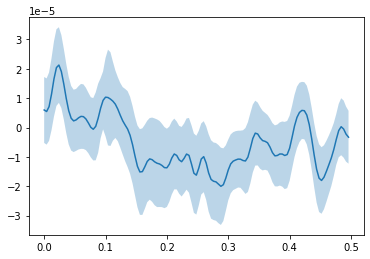

FIX_10.fif
10
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_10.fif...
Isotrak not found
    Range : 26821 ... 28071 =    107.284 ...   112.284 secs
Ready.
EEG 18 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


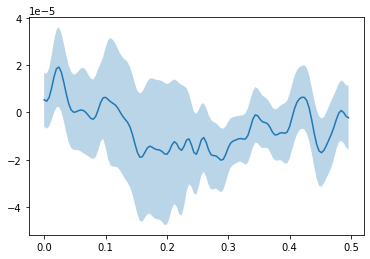

FIX_11.fif
11
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_11.fif...
Isotrak not found
    Range : 29109 ... 30359 =    116.436 ...   121.436 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


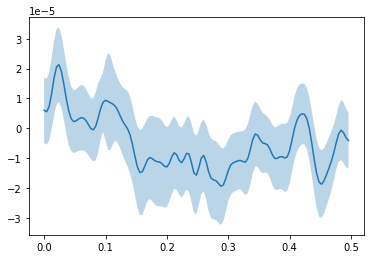

FIX_12.fif
12
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_12.fif...
Isotrak not found
    Range : 31488 ... 32738 =    125.952 ...   130.952 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


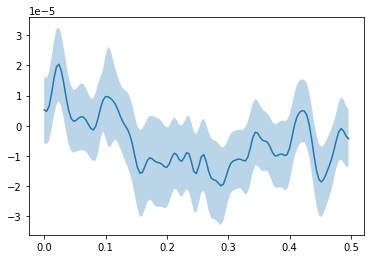

FIX_13.fif
13
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif...
Isotrak not found
    Range : 33330 ... 34580 =    133.320 ...   138.320 secs
Ready.
EEG 9 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


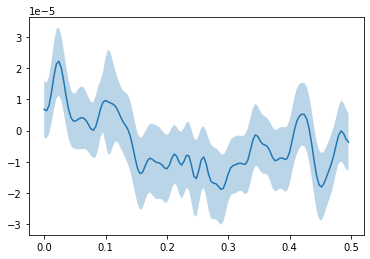

FIX_14.fif
14
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_14.fif...
Isotrak not found
    Range : 35542 ... 36792 =    142.168 ...   147.168 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


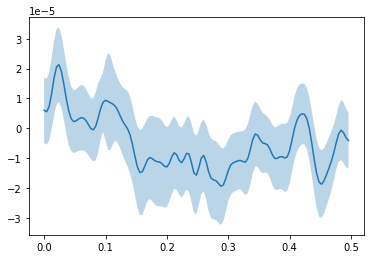

FIX_15.fif
15
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_15.fif...
Isotrak not found
    Range : 37630 ... 38880 =    150.520 ...   155.520 secs
Ready.
EEG 18 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


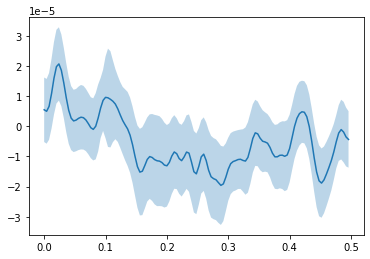

FIX_16.fif
16
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_16.fif...
Isotrak not found
    Range : 39721 ... 40971 =    158.884 ...   163.884 secs
Ready.
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


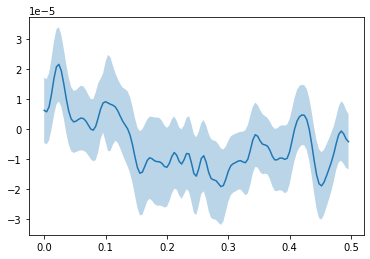

FIX_17.fif
17
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_17.fif...
Isotrak not found
    Range : 42067 ... 43317 =    168.268 ...   173.268 secs
Ready.
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


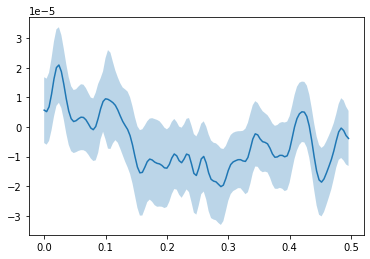

FIX_18.fif
18
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_18.fif...
Isotrak not found
    Range : 43984 ... 45234 =    175.936 ...   180.936 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


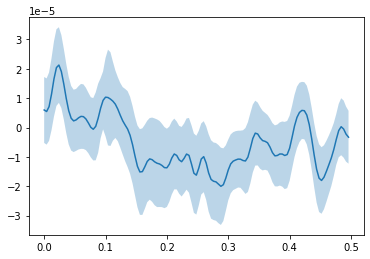

FIX_19.fif
19
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_19.fif...
Isotrak not found
    Range : 46384 ... 47634 =    185.536 ...   190.536 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 5 skipped -- Bad channel
EEG 11 skipped -- Bad channel
EEG 13 skipped -- Bad channel
EEG 17 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel
EEG 32 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


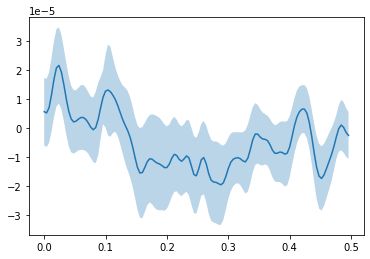

FIX_20.fif
20
Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_20.fif...
Isotrak not found
    Range : 49109 ... 50359 =    196.436 ...   201.436 secs
Ready.
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-192-f8b4ecef4b99>:11: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_20.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawRi = mne.io.read_raw_fif(filepath)


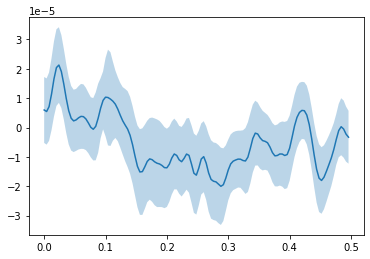

In [192]:
subject_dir = r'reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/'
times_R = []
erp_mean_R = []
erp_std_R = []
for entry in os.scandir(subject_dir):
    if (entry.name.startswith("FIX") and entry.path.endswith(".fif") and entry.is_file()):
        filepath = entry.path
        filename = entry.name
        print(filename)
        print(filename[-6:-4])
        rawRi = mne.io.read_raw_fif(filepath)
        times_Ri, erp_mean_Ri, erp_std_Ri = segment_level_erp(rawRi)
        rawRi.close()
        plt.plot(times_Ri, erp_mean_Ri)
        plt.fill_between(times_Ri, erp_mean_Ri-erp_std_Ri, erp_mean_Ri+erp_std_Ri, alpha=0.3)
        plt.show()
        times_R.append(times_Ri)
        erp_mean_R.append(erp_mean_Ri)
        erp_std_R.append(erp_std_Ri)

Opening raw data file reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif...
Isotrak not found
    Range : 50809 ... 52059 =    203.236 ...   208.236 secs
Ready.
Reading 0 ... 1250  =      0.000 ...     5.000 secs...
EEG 1 skipped -- Bad channel
EEG 2 skipped -- Bad channel
EEG 5 skipped -- Bad channel
EEG 7 skipped -- Bad channel
EEG 11 skipped -- Bad channel
EEG 13 skipped -- Bad channel
EEG 18 skipped -- Bad channel
EEG 21 skipped -- Bad channel
EEG 26 skipped -- Bad channel
EEG 27 skipped -- Bad channel
EEG 29 skipped -- Bad channel
EEG 30 skipped -- Bad channel
EEG 31 skipped -- Bad channel


<ipython-input-193-9245a34833b8>:1: RuntimeWarning: This filename (reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  rawF21 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif', preload=True)


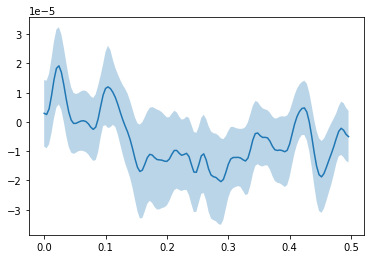

In [193]:
rawF21 = mne.io.read_raw_fif('reconstructed_DASS21_edfs/DASS_SAaransh_18-09-2018_20180918_035847_fil/FIX_21.fif', preload=True)
times_F21, erp_mean_F21, erp_std_F21 = segment_level_erp(rawF21)
plt.plot(times_F21, erp_mean_F21)
plt.fill_between(times_F21, erp_mean_F21-erp_std_F21, erp_mean_F21+erp_std_F21, alpha=0.3)